In [1]:
import os
from cycler import cycler

import numpy as np
from scipy.stats import mode

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc, cm
import matplotlib
from matplotlib.patches import Patch

In [2]:
palette = cycler(color=cm.Set1.colors)
rc('axes', prop_cycle=palette)
matplotlib.rcParams['font.family'] = ['serif']

SIMULATOR_SEED = 1992
NOISE_STD = 0.1
FINAL_TIME = 100
TIME_STEP = 0.1
CONTAMINATION = [0.00, 0.05, 0.1, 0.15]
BETA = [5e-3, 1e-3]

In [3]:
def format_beta(beta_values):
    formatted_betas = []
    for beta in beta_values:
        if beta < 1e-3:
            exponent = int(np.floor(np.log10(beta)))
            coefficient = beta / (10 ** exponent)
            if coefficient == 1:
                formatted_beta = r"$10^{{{}}}$".format(exponent)
            else:
                formatted_beta = f"{coefficient:g}" + r"$\times10^{{{}}}$".format(exponent)
        else:
            formatted_beta = str(beta)
        formatted_betas.append(formatted_beta)
    return formatted_betas


BETA = format_beta(BETA)

LABELS = np.array(['ENKS'] + ['VOE'] + [r'$\beta$ = {}'.format(b) for b in BETA])
NUM_LATENT = 2
fontsize = 16
print(BETA)

['0.005', '0.001']


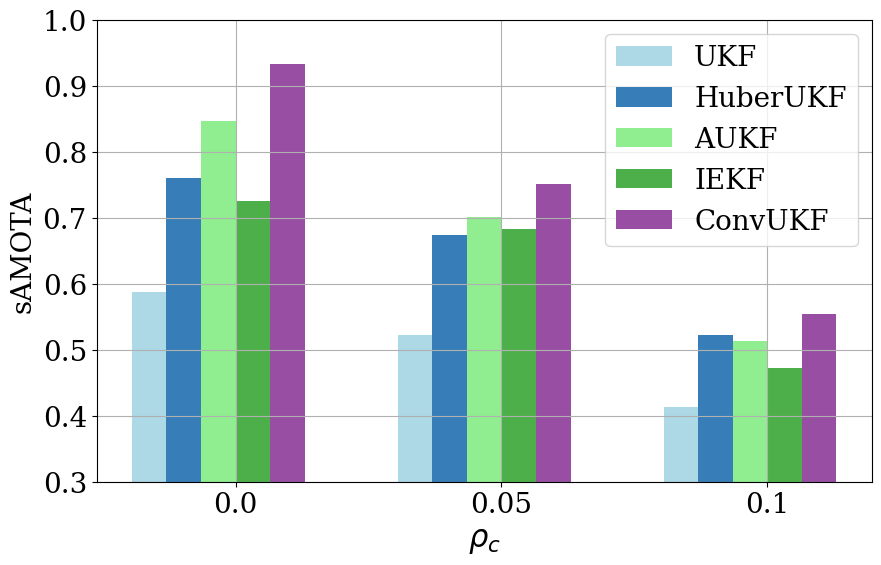

('lightblue', 'C1', 'C4', 'C2', 'C3', 'pink')

In [7]:
plt.rcParams.update({'font.size': 20})

# Given data
ukf_results = np.array([0.5873, 0.5221, 0.4132, 0.2567])
huberukf_results = np.array([0.7604, 0.6733, 0.5225, 0.3615])
ekf_results = np.array([ 0.8463, 0.7016,0.5133, 0.3542])
iekf_results = np.array([0.7253, 0.6826, 0.4719, 0.3626])
convukf1_results = np.array([0.9321 , 0.7460, 0.5377, 0.3941])
convukf5_results = np.array([0.9332, 0.7507, 0.5535, 0.3707])


# Concatenate the data
concatenated_data = np.stack([
    ukf_results,
    huberukf_results,
    ekf_results,
    iekf_results,
    convukf1_results,
    convukf5_results
], axis=-1)

# for patch, color in zip(box['boxes'], colors):
#         patch.set_facecolor(color)
colors = ['lightblue', 'C0', 'C1', 'C2', 'C3', 'C4', 'C6']
lighter_colors = ['lightblue', 'C1', 'lightgreen', 'C2', 'C3', 'C7']
# x-axis labels
pc_values = [0.00, 0.05, 0.10, 0.15]

ukf_results = ukf_results[0:3]
huberukf_results = huberukf_results[0:3]
ekf_results = ekf_results[0:3]
iekf_results = iekf_results[0:3]
convukf1_results = convukf1_results[0:3]
convukf5_results = convukf5_results[0:3]
pc_values = pc_values[0:3]

figsize = (10,6)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=figsize)

# Add some space between the bars
bar_width = 0.13
indices = np.arange(len(pc_values))

# Plot each method's result with a new index and specified lighter color
ukf_bar = ax.bar(indices - bar_width * 2, ukf_results, bar_width, label='UKF', color=lighter_colors[0])
huberukf_bar = ax.bar(indices - bar_width, huberukf_results, bar_width, label='HuberUKF', color=lighter_colors[1])
ekf_bar = ax.bar(indices, ekf_results, bar_width, label='AUKF', color=lighter_colors[2])
iekf_bar = ax.bar(indices + bar_width, iekf_results, bar_width, label='IEKF', color=lighter_colors[3])
convukf1_bar = ax.bar(indices + bar_width * 2, convukf5_results, bar_width, label=r'ConvUKF', color=lighter_colors[4])
# convukf5_bar = ax.bar(indices + bar_width * 3, convukf5_results, bar_width, label=r'AConvUKF', color=lighter_colors[5])


# Setting the x-axis labels and their positions
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(pc_values)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sAMOTA')
ax.set_xlabel(r'$\rho_c$', fontsize=fontsize+6)
ax.legend()
ax.grid(0.1)
ax.set_ylim(0.3, 1)

# Save the figure
plt.savefig('diver.pdf', bbox_inches='tight', dpi=300)
plt.show()

'C0', 'C1', 'C2', 'C3', 'C4', 'C6'
'lightblue', 'C1', 'C4', 'C2', 'C3', 'pink'


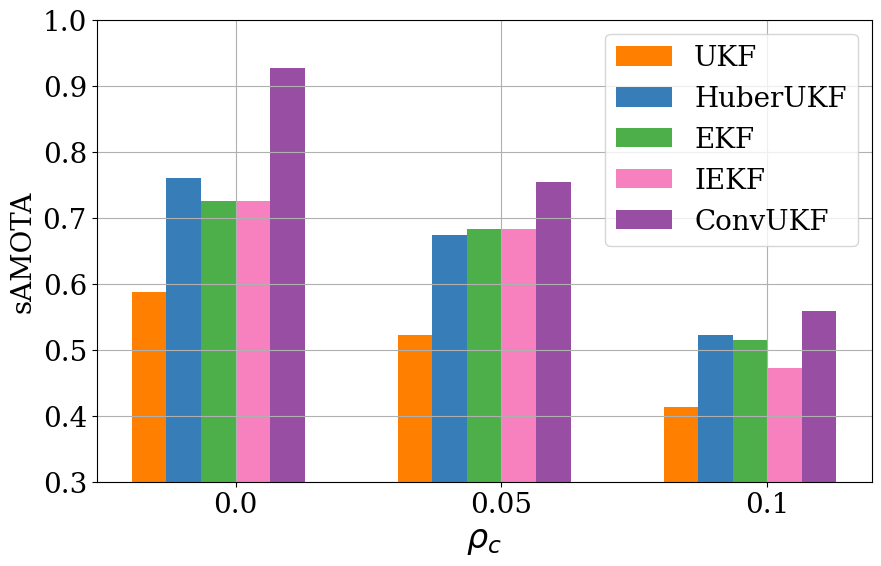

In [5]:
colors = ['lightblue', 'C0', 'C1', 'C2', 'C3', 'C4', 'C6']
lighter_colors = ['C4', 'C1', 'C2', 'C7', 'C3', 'C7']
# x-axis labels
pc_values = [0.00, 0.05, 0.10, 0.15]

ukf_results = ukf_results[0:3]
huberukf_results = huberukf_results[0:3]
ekf_results = ekf_results[0:3]
iekf_results = iekf_results[0:3]
convukf1_results = convukf1_results[0:3]
convukf5_results = convukf5_results[0:3]
pc_values = pc_values[0:3]

figsize = (10,6)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=figsize)

# Add some space between the bars
bar_width = 0.13
indices = np.arange(len(pc_values))

# Plot each method's result with a new index and specified lighter color
ukf_bar = ax.bar(indices - bar_width * 2, ukf_results, bar_width, label='UKF', color=lighter_colors[0])
huberukf_bar = ax.bar(indices - bar_width, huberukf_results, bar_width, label='HuberUKF', color=lighter_colors[1])
ekf_bar = ax.bar(indices, ekf_results, bar_width, label='EKF', color=lighter_colors[2])
iekf_bar = ax.bar(indices + bar_width, iekf_results, bar_width, label='IEKF', color=lighter_colors[3])
convukf1_bar = ax.bar(indices + bar_width * 2, convukf1_results, bar_width, label=r'ConvUKF', color=lighter_colors[4])
# convukf5_bar = ax.bar(indices + bar_width * 3, convukf5_results, bar_width, label=r'ConvUKF$\beta=0.001$', color=lighter_colors[5])


# Setting the x-axis labels and their positions
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(pc_values)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sAMOTA')
ax.set_xlabel(r'$\rho_c$', fontsize=fontsize+8)
ax.legend()
ax.grid(0.1)
ax.set_ylim(0.3, 1)

# Save the figure
plt.savefig('diver_simple.pdf', bbox_inches='tight', dpi=300)
plt.show()

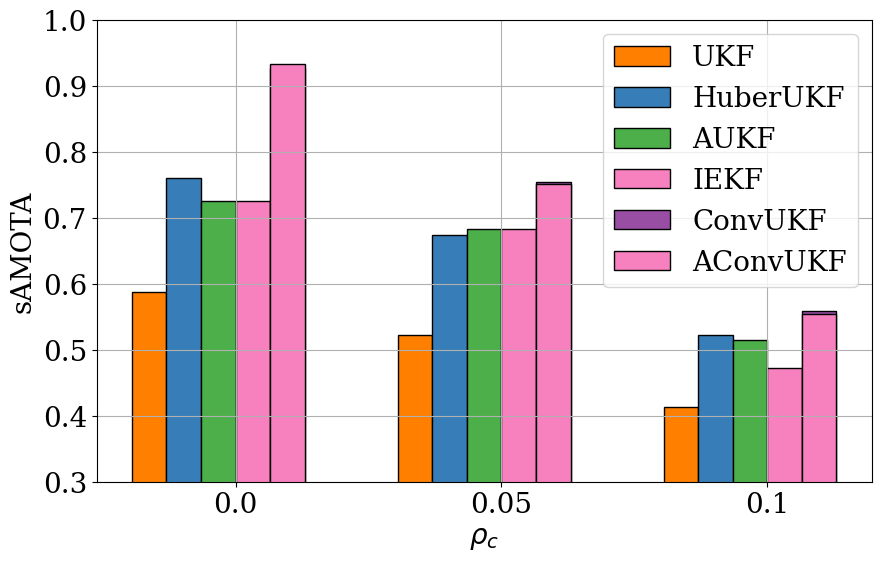

In [6]:
import matplotlib.pyplot as plt
import numpy as np

lighter_colors = ['C4', 'C1', 'C2', 'C7', 'C3', 'C7']
pc_values = [0.00, 0.05, 0.10, 0.15]

ukf_results = ukf_results[0:3]
huberukf_results = huberukf_results[0:3]
ekf_results = ekf_results[0:3]
iekf_results = iekf_results[0:3]
convukf1_results = convukf1_results[0:3]
convukf5_results = convukf5_results[0:3]
pc_values = pc_values[0:3]

figsize = (10,6)
fig, ax = plt.subplots(figsize=figsize)

bar_width = 0.13
indices = np.arange(len(pc_values))

ukf_bar = ax.bar(indices - bar_width * 2, ukf_results, bar_width, label='UKF', color=lighter_colors[0], edgecolor='black')
huberukf_bar = ax.bar(indices - bar_width, huberukf_results, bar_width, label='HuberUKF', color=lighter_colors[1], edgecolor='black')
ekf_bar = ax.bar(indices, ekf_results, bar_width, label='AUKF', color=lighter_colors[2], edgecolor='black')
iekf_bar = ax.bar(indices + bar_width, iekf_results, bar_width, label='IEKF', color=lighter_colors[3], edgecolor='black')
convukf1_bar = ax.bar(indices + bar_width * 2, convukf1_results, bar_width, label=r'ConvUKF', color=lighter_colors[4], edgecolor='black')
convukf5_bar = ax.bar(indices + bar_width * 2, convukf5_results, bar_width, label=r'AConvUKF', color=lighter_colors[5], edgecolor='black')

ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(pc_values)

ax.set_ylabel('sAMOTA')
ax.set_xlabel(r'$\rho_c$')
ax.legend()
ax.grid(0.1)
ax.set_ylim(0.3, 1)

plt.savefig('diver_simple1.pdf', bbox_inches='tight', dpi=300)
plt.show()


NameError: name 'methods' is not defined

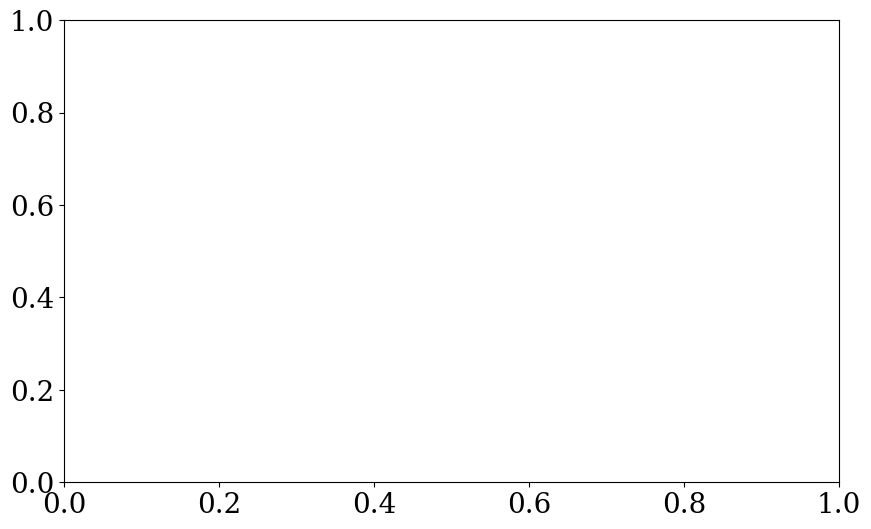

In [7]:
from matplotlib.colors import LinearSegmentedColormap

# 定义渐变颜色
colors = ['red', 'pink']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# 设置图形大小
figsize = (10, 6)
fig, ax = plt.subplots(figsize=figsize)

# 绘制渐变条形图
for i, (results, label, color) in enumerate(zip([ukf_results, huberukf_results, ekf_results, iekf_results, convukf1_results], methods, lighter_colors)):
    ax.bar(indices + bar_width * (i - len(methods) / 2), results, bar_width, label=label, color=cmap(i / len(methods)), edgecolor='black', linewidth=0.7, alpha=0.9, zorder=3)

# 添加阴影
ax.bar(indices, [1] * len(pc_values), color='gray', alpha=0.1, width=0.02, zorder=2)

# 设置轴标签和标题
ax.set_xticks(indices)
ax.set_xticklabels(pc_values)
ax.set_ylabel('sAMOTA')
ax.set_xlabel(r'$\rho_c$')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_ylim(0.3, 1)

# 保存和展示图形
plt.savefig('diver_simple_new.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from PIL import Image

# Load the images
image1 = Image.open('outlier1.jpg')
image2 = Image.open('outlier2.jpg')

# Convert images to RGB to ensure compatibility with PDF format
image1 = image1.convert('RGB')
image2 = image2.convert('RGB')

# Save the images as a single PDF
pdf1_path = 'outlier1.pdf'
pdf2_path = 'outlier2.pdf'
# Save the images as PDF
image1.save(pdf1_path, "PDF", resolution=100.0)
image2.save(pdf2_path, "PDF", resolution=100.0)



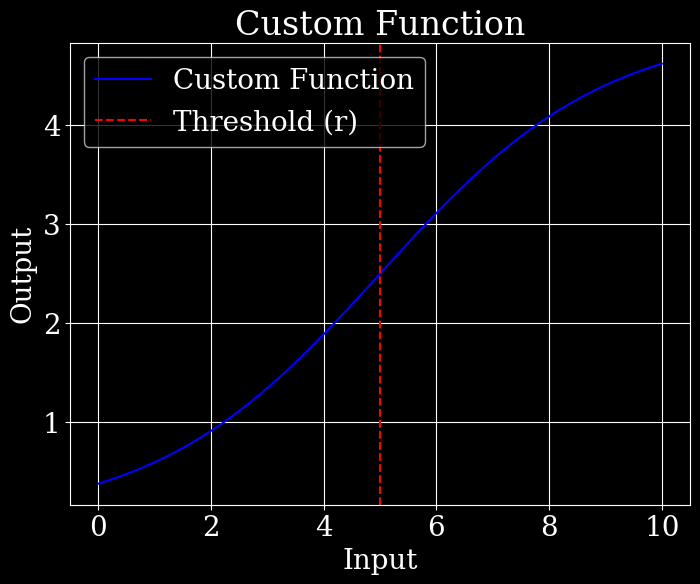

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def custom_function(x, r=0, k=1):
    return r / (1 + np.exp(-k * (x - r)))

# 参数设置
r = 5  # 阈值参数
k = 0.5  # 斜率参数

# 生成输入值
x_values = np.linspace(0, 10, 100)
y_values = custom_function(x_values, r, k)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Custom Function', color='blue')
plt.title('Custom Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axvline(x=r, color='red', linestyle='--', label='Threshold (r)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data = """
predict time: 0.11607011159261067 ms, 6iters46   
update time: 0.3921190897623698 ms, 6iters
predict time: 0.17118453979492188 ms, 10iters6   
update time: 1.2533324105398995 ms, 7iters
predict time: 0.17059933055530896 ms, 11iters6   
update time: 0.3618597984313965 ms, 8iters
predict time: 0.16405582427978516 ms, 10iters6   
update time: 0.31076158796037945 ms, 7iters
predict time: 0.09747913905552455 ms, 14iters6   
update time: 0.3657341003417969 ms, 7iters
predict time: 0.18844237694373497 ms, 13iters6   
update time: 0.4024505615234375 ms, 7iters
predict time: 0.1865386962890625 ms, 10iters46   
update time: 0.41525704520089285 ms, 7iters
predict time: 0.18121798833211264 ms, 12iters6   
update time: 0.7243156433105469 ms, 9iters
predict time: 0.34936269124348956 ms, 12iters6   
update time: 0.7090909140450614 ms, 7iters
predict time: 0.35084210909329927 ms, 13iters46   
update time: 0.2477884292602539 ms, 10iters
predict time: 0.14551480611165366 ms, 12iters46   
update time: 0.33041834831237793 ms, 8iters
predict time: 0.14306948735163763 ms, 13iters46   
update time: 0.3197458055284288 ms, 9iters
predict time: 0.1370723430926983 ms, 13iters446   
update time: 0.31117959456010297 ms, 11iters
predict time: 0.14343628516564003 ms, 13iters46   
update time: 0.32181209988064235 ms, 9iters
predict time: 0.14263040879193475 ms, 17iters46   
update time: 0.31564452431418677 ms, 11iters
predict time: 0.15685137580422795 ms, 17iters46   
update time: 0.31883716583251953 ms, 10iters
predict time: 0.14230608940124512 ms, 16iters46   
update time: 0.31631643121892755 ms, 11iters
predict time: 0.14670689900716147 ms, 15iters46   
update time: 0.3195047378540039 ms, 10iters
predict time: 0.14187395572662354 ms, 16iters46   
update time: 0.3164807955423991 ms, 12iters
predict time: 0.14299504897173712 ms, 17iters46   
update time: 0.35184079950506036 ms, 11iters
predict time: 0.09772181510925293 ms, 16iters46   
update time: 0.35556879910555755 ms, 11iters
predict time: 0.1429594480074369 ms, 13iters446   
update time: 0.3322124481201172 ms, 10iters
predict time: 0.19505818684895834 ms, 15iters46   
update time: 0.3192901611328125 ms, 10iters
predict time: 0.1560846964518229 ms, 15iters446   
update time: 0.3209114074707031 ms, 9iters
"""

predict_times = []
update_times = []

# 将数据按行分割
lines = data.strip().split("\n")

# 提取时间数据
for line in lines:
    if "predict time" in line:
        predict_time = float(line.split(":")[1].split(" ")[1])
        predict_times.append(predict_time)
    elif "update time" in line:
        update_time = float(line.split(":")[1].split(" ")[1])
        update_times.append(update_time)

# 计算平均值并保留4位小数
avg_predict_time = round(sum(predict_times) / len(predict_times), 4)
avg_update_time = round(sum(update_times) / len(update_times), 4)

# 求和并保留4位小数
total_time = round(avg_predict_time + avg_update_time, 4)

print("Average predict time:", avg_predict_time, "ms")
print("Average update time:", avg_update_time, "ms")
print("Total time:", total_time, "ms")


Average predict time: 0.1671 ms
Average update time: 0.4055 ms
Total time: 0.5726 ms
